In [1]:
import pandas as pd
import re
# Load the dataset
file_path = r'C:\Users\Admin\Desktop\data\updated_filtered_ds_thuebao.csv'
df = pd.read_csv(file_path)

In [2]:
# Ensure that all TOCDO values are treated as strings
df['TOCDO'] = df['TOCDO'].astype(str).str.strip()

# Replace specific values with '0 Mbps' and others with '500 Mbps' or '150 Mbps'
replacement_dict = {
    'Basic – 2021': '0 Mbps',
    'Chuẩn': '0 Mbps',
    'Chuẩn Mới': '0 Mbps',
    'Chuẩn – 2021': '0 Mbps',
    'LiveTv HD': '0 Mbps',
    'MYTV Gold HD': '0 Mbps',
    'MyTV Basic': '0 Mbps',
    'MyTV Gold': '0 Mbps',
    'MyTV Silver': '0 Mbps',
    'MyTV Silver HD': '0 Mbps',
    'MyTV Trải nghiệm': '0 Mbps',
    'NC_PLUS': '0 Mbps',
    'Nâng Cao – 2021': '0 Mbps',
    'Nâng cao': '0 Mbps',
    'Nâng cao Mới': '0 Mbps',
    'VIP': '0 Mbps',
    'VIP Mới': '0 Mbps',
    'Wifi Mesh 6': '500 Mbps',
    'Mesh wifi': '150 Mbps'
}

# Clean up the strings in the TOCDO column before replacing
df['TOCDO'] = df['TOCDO'].replace(replacement_dict)

# Define the cleaning function
def clean_tocdo(value):
    if re.search(r'\d+\s*[Mm][Bb][Pp]?[Ss]?', value):
        match = re.search(r'(\d+)\s*[Mm][Bb][Pp]?[Ss]?', value)
        if match:
            return match.group(1) + ' Mbps'
    return value.strip()

# Apply the cleaning function to the TOCDO column
df['TOCDO'] = df['TOCDO'].apply(clean_tocdo)

# Further clean the TOCDO values
def further_clean_tocdo(value):
    if re.search(r'\d+\s*[Mm][Bb][Pp]?[Ss]?', value):
        match = re.search(r'(\d+)', value)
        if match:
            return match.group(1) + ' Mbps'
    return value.strip()

# Apply the further cleaning function to the TOCDO column
df['TOCDO'] = df['TOCDO'].apply(further_clean_tocdo)

# Group by the final cleaned TOCDO values
tocdo_final_grouped = df.groupby('TOCDO').size().reset_index(name='Count')
# Display the result
print(tocdo_final_grouped)

        TOCDO   Count
0      0 Mbps  105760
1     10 Mbps       1
2    100 Mbps   19730
3   1000 Mbps    3755
4    120 Mbps   55639
5    140 Mbps     670
6    150 Mbps  118648
7    160 Mbps     477
8    180 Mbps     159
9    200 Mbps   16990
10   240 Mbps     221
11   250 Mbps   26545
12    30 Mbps     161
13   300 Mbps    9983
14   350 Mbps    1475
15    36 Mbps       2
16    40 Mbps    1269
17   400 Mbps    1165
18    50 Mbps   13120
19   500 Mbps    4188
20    60 Mbps    8740
21   600 Mbps      35
22    70 Mbps      64
23    80 Mbps   33632
24   800 Mbps     418
25        nan      13


In [3]:
df

,KHACHHANG_ID,THUEBAO_ID,NGAY_SD,NGAYNGUNG_SD,DICHVU,THOIHAN,TOCDO,TRANGTHAITB,SOTHANG_DATCOC,TRATRUOC,TONGNO,TRANGBI_ID,DOITUONG,HINHTHUC_TT,Tenure_month,SOLANBAOHONG,MUCDOHAILONG
0,10250422,4738079.0,2017-05-08 15:02:00,NaN,Fiber,NaN,50 Mbps,Hoạt động bình thường,NaN,NaN,NaN,4.0,cn,Tại điểm giao dịch,85.0,3,5
1,10232662,12126858.0,2024-02-21 11:39:00,NaN,Fiber,NaN,200 Mbps,Hoạt động bình thường,7.0,1.0,NaN,NaN,cn,Tại điểm giao dịch,4.0,4,4
2,9851970,9581981.0,2022-11-10 16:18:00,NaN,Fiber,NaN,120 Mbps,Hoạt động bình thường,15.0,1.0,NaN,4.0,dn,Tại điểm giao dịch,19.0,3,4
3,10271214,11864980.0,2023-10-12 11:21:00,NaN,Fiber,NaN,150 Mbps,Hoạt động bình thường,7.0,1.0,NaN,NaN,dn,Tại điểm giao dịch,8.0,1,5
4,10250633,9052744.0,2021-11-09 09:49:00,NaN,Fiber,NaN,150 Mbps,Hoạt động bình thường,7.0,1.0,NaN,4.0,dn,Tại điểm giao dịch,31.0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422855,10021090,9721277.0,2023-02-01 17:39:00,NaN,Fiber,NaN,150 Mbps,Hoạt động bình thường,NaN,NaN,NaN,NaN,cn,Tại điểm giao dịch,16.0,2,4
422856,9582131,9191145.0,2022-03-15 16:38:00,NaN,Wifi Mesh,NaN,150 Mbps,Hoạt động bình thường,NaN,NaN,NaN,4.0,dn,Tại điểm giao dịch,27.0,1,4
422857,9582131,9190942.0,2022-03-15 14:43:00,NaN,Wifi Mesh,NaN,150 Mbps,Hoạt động bình thường,NaN,NaN,NaN,4.0,dn,Tại điểm giao dịch,27.0,3,4
422858,9582131,9191661.0,2022-03-16 11:15:00,NaN,Fiber,NaN,150 Mbps,Hoạt động bình thường,NaN,NaN,NaN,4.0,dn,Tại điểm giao dịch,27.0,2,5


In [4]:
df.head()

,KHACHHANG_ID,THUEBAO_ID,NGAY_SD,NGAYNGUNG_SD,DICHVU,THOIHAN,TOCDO,TRANGTHAITB,SOTHANG_DATCOC,TRATRUOC,TONGNO,TRANGBI_ID,DOITUONG,HINHTHUC_TT,Tenure_month,SOLANBAOHONG,MUCDOHAILONG
0,10250422,4738079.0,2017-05-08 15:02:00,NaN,Fiber,NaN,50 Mbps,Hoạt động bình thường,NaN,NaN,NaN,4.0,cn,Tại điểm giao dịch,85.0,3,5
1,10232662,12126858.0,2024-02-21 11:39:00,NaN,Fiber,NaN,200 Mbps,Hoạt động bình thường,7.0,1.0,NaN,NaN,cn,Tại điểm giao dịch,4.0,4,4
2,9851970,9581981.0,2022-11-10 16:18:00,NaN,Fiber,NaN,120 Mbps,Hoạt động bình thường,15.0,1.0,NaN,4.0,dn,Tại điểm giao dịch,19.0,3,4
3,10271214,11864980.0,2023-10-12 11:21:00,NaN,Fiber,NaN,150 Mbps,Hoạt động bình thường,7.0,1.0,NaN,NaN,dn,Tại điểm giao dịch,8.0,1,5
4,10250633,9052744.0,2021-11-09 09:49:00,NaN,Fiber,NaN,150 Mbps,Hoạt động bình thường,7.0,1.0,NaN,4.0,dn,Tại điểm giao dịch,31.0,2,4


In [5]:
df.describe()

,KHACHHANG_ID,THUEBAO_ID,SOTHANG_DATCOC,TRATRUOC,TONGNO,TRANGBI_ID,Tenure_month,SOLANBAOHONG,MUCDOHAILONG
count,4.228600e+05,4.228600e+05,261370.000000,253329.0,4.984500e+04,250777.000000,422854.000000,422860.000000,422860.000000
mean,7.918181e+06,8.760527e+06,9.234683,1.0,3.548012e+05,4.469449,41.403884,3.731869,4.249378
std,3.023594e+06,3.228754e+06,3.671296,0.0,6.645961e+05,1.174098,44.158971,2.213343,0.927117
min,1.023000e+03,1.218751e+06,1.000000,1.0,1.000000e+00,1.000000,0.000000,1.000000,1.000000
25%,4.976226e+06,7.184491e+06,7.000000,1.0,7.384600e+04,4.000000,8.000000,2.000000,4.000000
50%,9.670180e+06,9.230048e+06,7.000000,1.0,2.058070e+05,4.000000,22.000000,3.000000,4.000000
75%,1.012958e+07,1.184021e+07,12.000000,1.0,4.006430e+05,4.000000,65.000000,5.000000,5.000000
max,1.027737e+07,1.228923e+07,36.000000,1.0,2.809950e+07,10.000000,1494.000000,10.000000,5.000000


Ta thấy ở cột tenure month có giá trị 1494 trong khi đó 75% giá trị chỉ có 65 vì vậy cần xoá giá trị đó


In [6]:
df = df[df['Tenure_month'] != 1494]

In [7]:
df.describe()

,KHACHHANG_ID,THUEBAO_ID,SOTHANG_DATCOC,TRATRUOC,TONGNO,TRANGBI_ID,Tenure_month,SOLANBAOHONG,MUCDOHAILONG
count,4.228590e+05,4.228590e+05,261370.000000,253329.0,4.984500e+04,250776.000000,422853.000000,422859.000000,422859.000000
mean,7.918189e+06,8.760537e+06,9.234683,1.0,3.548012e+05,4.469451,41.400449,3.731868,4.249379
std,3.023593e+06,3.228751e+06,3.671296,0.0,6.645961e+05,1.174100,44.102487,2.213346,0.927118
min,1.023000e+03,1.218751e+06,1.000000,1.0,1.000000e+00,1.000000,0.000000,1.000000,1.000000
25%,4.976228e+06,7.184492e+06,7.000000,1.0,7.384600e+04,4.000000,8.000000,2.000000,4.000000
50%,9.670183e+06,9.230050e+06,7.000000,1.0,2.058070e+05,4.000000,22.000000,3.000000,4.000000
75%,1.012958e+07,1.184021e+07,12.000000,1.0,4.006430e+05,4.000000,65.000000,5.000000,5.000000
max,1.027737e+07,1.228923e+07,36.000000,1.0,2.809950e+07,10.000000,281.000000,10.000000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422859 entries, 0 to 422859
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   KHACHHANG_ID    422859 non-null  int64  
 1   THUEBAO_ID      422859 non-null  float64
 2   NGAY_SD         422853 non-null  object 
 3   NGAYNGUNG_SD    61383 non-null   object 
 4   DICHVU          422859 non-null  object 
 5   THOIHAN         429 non-null     object 
 6   TOCDO           422859 non-null  object 
 7   TRANGTHAITB     422859 non-null  object 
 8   SOTHANG_DATCOC  261370 non-null  float64
 9   TRATRUOC        253329 non-null  float64
 10  TONGNO          49845 non-null   float64
 11  TRANGBI_ID      250776 non-null  float64
 12  DOITUONG        422859 non-null  object 
 13  HINHTHUC_TT     422859 non-null  object 
 14  Tenure_month    422853 non-null  float64
 15  SOLANBAOHONG    422859 non-null  int64  
 16  MUCDOHAILONG    422859 non-null  int64  
dtypes: float64(6), 

In [9]:
df['TRANGTHAITB'].value_counts()

TRANGTHAITB
Hoạt động bình thường      352015
Thanh lý cưỡng bức          51658
Thanh lý theo yêu cầu        9609
Khoá 2 chiều do nợ cước      7335
Tạm dừng                     2230
Đổi số/Acc                     12
Name: count, dtype: int64

In [10]:
 # Create the new column TRANGTHAI_ROIBO
df['TRANGTHAI_ROIBO'] = df['TRANGTHAITB'].apply(lambda x: 0 if x in ['Hoạt động bình thường', 'Tạm dừng', 'Đổi số/Acc'] else 1)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9588\1389844306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TRANGTHAI_ROIBO'] = df['TRANGTHAITB'].apply(lambda x: 0 if x in ['Hoạt động bình thường', 'Tạm dừng', 'Đổi số/Acc'] else 1)


In [11]:
df

,KHACHHANG_ID,THUEBAO_ID,NGAY_SD,NGAYNGUNG_SD,DICHVU,THOIHAN,TOCDO,TRANGTHAITB,SOTHANG_DATCOC,TRATRUOC,TONGNO,TRANGBI_ID,DOITUONG,HINHTHUC_TT,Tenure_month,SOLANBAOHONG,MUCDOHAILONG,TRANGTHAI_ROIBO
0,10250422,4738079.0,2017-05-08 15:02:00,NaN,Fiber,NaN,50 Mbps,Hoạt động bình thường,NaN,NaN,NaN,4.0,cn,Tại điểm giao dịch,85.0,3,5,0
1,10232662,12126858.0,2024-02-21 11:39:00,NaN,Fiber,NaN,200 Mbps,Hoạt động bình thường,7.0,1.0,NaN,NaN,cn,Tại điểm giao dịch,4.0,4,4,0
2,9851970,9581981.0,2022-11-10 16:18:00,NaN,Fiber,NaN,120 Mbps,Hoạt động bình thường,15.0,1.0,NaN,4.0,dn,Tại điểm giao dịch,19.0,3,4,0
3,10271214,11864980.0,2023-10-12 11:21:00,NaN,Fiber,NaN,150 Mbps,Hoạt động bình thường,7.0,1.0,NaN,NaN,dn,Tại điểm giao dịch,8.0,1,5,0
4,10250633,9052744.0,2021-11-09 09:49:00,NaN,Fiber,NaN,150 Mbps,Hoạt động bình thường,7.0,1.0,NaN,4.0,dn,Tại điểm giao dịch,31.0,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422855,10021090,9721277.0,2023-02-01 17:39:00,NaN,Fiber,NaN,150 Mbps,Hoạt động bình thường,NaN,NaN,NaN,NaN,cn,Tại điểm giao dịch,16.0,2,4,0
422856,9582131,9191145.0,2022-03-15 16:38:00,NaN,Wifi Mesh,NaN,150 Mbps,Hoạt động bình thường,NaN,NaN,NaN,4.0,dn,Tại điểm giao dịch,27.0,1,4,0
422857,9582131,9190942.0,2022-03-15 14:43:00,NaN,Wifi Mesh,NaN,150 Mbps,Hoạt động bình thường,NaN,NaN,NaN,4.0,dn,Tại điểm giao dịch,27.0,3,4,0
422858,9582131,9191661.0,2022-03-16 11:15:00,NaN,Fiber,NaN,150 Mbps,Hoạt động bình thường,NaN,NaN,NaN,4.0,dn,Tại điểm giao dịch,27.0,2,5,0


Ta tạo thêm 1 cột TRANGTHAI_ROIBO có nhãn là 0 và 1.<br>
**Note**
1) Với những thuê bao có TRANGTHAITB là 'Hoạt động bình thường','Tạm dưng','Đổi số/Acc' ta gắn nhãn 0
2) Với những thuê bao có TRANGTHAITB còn lại ta gắn nhãn 1 

In [12]:
df['TOCDO'] = df['TOCDO'].str.replace(' Mbps', '')
df['TOCDO'].value_counts(
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9588\2420450841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TOCDO'] = df['TOCDO'].str.replace(' Mbps', '')


TOCDO
150     118648
0       105760
120      55638
80       33632
250      26545
100      19730
200      16990
50       13120
300       9983
60        8740
500       4188
1000      3755
350       1475
40        1269
400       1165
140        670
160        477
800        418
240        221
30         161
180        159
70          64
600         35
nan         13
36           2
10           1
Name: count, dtype: int64

In [13]:
df

,KHACHHANG_ID,THUEBAO_ID,NGAY_SD,NGAYNGUNG_SD,DICHVU,THOIHAN,TOCDO,TRANGTHAITB,SOTHANG_DATCOC,TRATRUOC,TONGNO,TRANGBI_ID,DOITUONG,HINHTHUC_TT,Tenure_month,SOLANBAOHONG,MUCDOHAILONG,TRANGTHAI_ROIBO
0,10250422,4738079.0,2017-05-08 15:02:00,NaN,Fiber,NaN,50,Hoạt động bình thường,NaN,NaN,NaN,4.0,cn,Tại điểm giao dịch,85.0,3,5,0
1,10232662,12126858.0,2024-02-21 11:39:00,NaN,Fiber,NaN,200,Hoạt động bình thường,7.0,1.0,NaN,NaN,cn,Tại điểm giao dịch,4.0,4,4,0
2,9851970,9581981.0,2022-11-10 16:18:00,NaN,Fiber,NaN,120,Hoạt động bình thường,15.0,1.0,NaN,4.0,dn,Tại điểm giao dịch,19.0,3,4,0
3,10271214,11864980.0,2023-10-12 11:21:00,NaN,Fiber,NaN,150,Hoạt động bình thường,7.0,1.0,NaN,NaN,dn,Tại điểm giao dịch,8.0,1,5,0
4,10250633,9052744.0,2021-11-09 09:49:00,NaN,Fiber,NaN,150,Hoạt động bình thường,7.0,1.0,NaN,4.0,dn,Tại điểm giao dịch,31.0,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422855,10021090,9721277.0,2023-02-01 17:39:00,NaN,Fiber,NaN,150,Hoạt động bình thường,NaN,NaN,NaN,NaN,cn,Tại điểm giao dịch,16.0,2,4,0
422856,9582131,9191145.0,2022-03-15 16:38:00,NaN,Wifi Mesh,NaN,150,Hoạt động bình thường,NaN,NaN,NaN,4.0,dn,Tại điểm giao dịch,27.0,1,4,0
422857,9582131,9190942.0,2022-03-15 14:43:00,NaN,Wifi Mesh,NaN,150,Hoạt động bình thường,NaN,NaN,NaN,4.0,dn,Tại điểm giao dịch,27.0,3,4,0
422858,9582131,9191661.0,2022-03-16 11:15:00,NaN,Fiber,NaN,150,Hoạt động bình thường,NaN,NaN,NaN,4.0,dn,Tại điểm giao dịch,27.0,2,5,0


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder

In [15]:
#sử dung label-encode cho cột DOITUONG
le=LabelEncoder()
df['DOITUONG']=le.fit_transform(df['DOITUONG'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_9588\1777585933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DOITUONG']=le.fit_transform(df['DOITUONG'])


In [16]:
df

,KHACHHANG_ID,THUEBAO_ID,NGAY_SD,NGAYNGUNG_SD,DICHVU,THOIHAN,TOCDO,TRANGTHAITB,SOTHANG_DATCOC,TRATRUOC,TONGNO,TRANGBI_ID,DOITUONG,HINHTHUC_TT,Tenure_month,SOLANBAOHONG,MUCDOHAILONG,TRANGTHAI_ROIBO
0,10250422,4738079.0,2017-05-08 15:02:00,NaN,Fiber,NaN,50,Hoạt động bình thường,NaN,NaN,NaN,4.0,0,Tại điểm giao dịch,85.0,3,5,0
1,10232662,12126858.0,2024-02-21 11:39:00,NaN,Fiber,NaN,200,Hoạt động bình thường,7.0,1.0,NaN,NaN,0,Tại điểm giao dịch,4.0,4,4,0
2,9851970,9581981.0,2022-11-10 16:18:00,NaN,Fiber,NaN,120,Hoạt động bình thường,15.0,1.0,NaN,4.0,1,Tại điểm giao dịch,19.0,3,4,0
3,10271214,11864980.0,2023-10-12 11:21:00,NaN,Fiber,NaN,150,Hoạt động bình thường,7.0,1.0,NaN,NaN,1,Tại điểm giao dịch,8.0,1,5,0
4,10250633,9052744.0,2021-11-09 09:49:00,NaN,Fiber,NaN,150,Hoạt động bình thường,7.0,1.0,NaN,4.0,1,Tại điểm giao dịch,31.0,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422855,10021090,9721277.0,2023-02-01 17:39:00,NaN,Fiber,NaN,150,Hoạt động bình thường,NaN,NaN,NaN,NaN,0,Tại điểm giao dịch,16.0,2,4,0
422856,9582131,9191145.0,2022-03-15 16:38:00,NaN,Wifi Mesh,NaN,150,Hoạt động bình thường,NaN,NaN,NaN,4.0,1,Tại điểm giao dịch,27.0,1,4,0
422857,9582131,9190942.0,2022-03-15 14:43:00,NaN,Wifi Mesh,NaN,150,Hoạt động bình thường,NaN,NaN,NaN,4.0,1,Tại điểm giao dịch,27.0,3,4,0
422858,9582131,9191661.0,2022-03-16 11:15:00,NaN,Fiber,NaN,150,Hoạt động bình thường,NaN,NaN,NaN,4.0,1,Tại điểm giao dịch,27.0,2,5,0


In [1]:
#One hot encode
df = pd.get_dummies(df, columns=['DICHVU'])

NameError: name 'pd' is not defined

In [18]:
df

,KHACHHANG_ID,THUEBAO_ID,NGAY_SD,NGAYNGUNG_SD,THOIHAN,TOCDO,TRANGTHAITB,SOTHANG_DATCOC,TRATRUOC,TONGNO,TRANGBI_ID,DOITUONG,HINHTHUC_TT,Tenure_month,SOLANBAOHONG,MUCDOHAILONG,TRANGTHAI_ROIBO,DICHVU_Fiber,DICHVU_MyTV,DICHVU_Wifi Mesh
0,10250422,4738079.0,2017-05-08 15:02:00,NaN,NaN,50,Hoạt động bình thường,NaN,NaN,NaN,4.0,0,Tại điểm giao dịch,85.0,3,5,0,True,False,False
1,10232662,12126858.0,2024-02-21 11:39:00,NaN,NaN,200,Hoạt động bình thường,7.0,1.0,NaN,NaN,0,Tại điểm giao dịch,4.0,4,4,0,True,False,False
2,9851970,9581981.0,2022-11-10 16:18:00,NaN,NaN,120,Hoạt động bình thường,15.0,1.0,NaN,4.0,1,Tại điểm giao dịch,19.0,3,4,0,True,False,False
3,10271214,11864980.0,2023-10-12 11:21:00,NaN,NaN,150,Hoạt động bình thường,7.0,1.0,NaN,NaN,1,Tại điểm giao dịch,8.0,1,5,0,True,False,False
4,10250633,9052744.0,2021-11-09 09:49:00,NaN,NaN,150,Hoạt động bình thường,7.0,1.0,NaN,4.0,1,Tại điểm giao dịch,31.0,2,4,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422855,10021090,9721277.0,2023-02-01 17:39:00,NaN,NaN,150,Hoạt động bình thường,NaN,NaN,NaN,NaN,0,Tại điểm giao dịch,16.0,2,4,0,True,False,False
422856,9582131,9191145.0,2022-03-15 16:38:00,NaN,NaN,150,Hoạt động bình thường,NaN,NaN,NaN,4.0,1,Tại điểm giao dịch,27.0,1,4,0,False,False,True
422857,9582131,9190942.0,2022-03-15 14:43:00,NaN,NaN,150,Hoạt động bình thường,NaN,NaN,NaN,4.0,1,Tại điểm giao dịch,27.0,3,4,0,False,False,True
422858,9582131,9191661.0,2022-03-16 11:15:00,NaN,NaN,150,Hoạt động bình thường,NaN,NaN,NaN,4.0,1,Tại điểm giao dịch,27.0,2,5,0,True,False,False


In [19]:
df=df.drop(columns=['HINHTHUC_TT','NGAY_SD','THOIHAN','TRANGBI_ID','KHACHHANG_ID','TRANGTHAITB'])

In [20]:
df

,THUEBAO_ID,NGAYNGUNG_SD,TOCDO,SOTHANG_DATCOC,TRATRUOC,TONGNO,DOITUONG,Tenure_month,SOLANBAOHONG,MUCDOHAILONG,TRANGTHAI_ROIBO,DICHVU_Fiber,DICHVU_MyTV,DICHVU_Wifi Mesh
0,4738079.0,NaN,50,NaN,NaN,NaN,0,85.0,3,5,0,True,False,False
1,12126858.0,NaN,200,7.0,1.0,NaN,0,4.0,4,4,0,True,False,False
2,9581981.0,NaN,120,15.0,1.0,NaN,1,19.0,3,4,0,True,False,False
3,11864980.0,NaN,150,7.0,1.0,NaN,1,8.0,1,5,0,True,False,False
4,9052744.0,NaN,150,7.0,1.0,NaN,1,31.0,2,4,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422855,9721277.0,NaN,150,NaN,NaN,NaN,0,16.0,2,4,0,True,False,False
422856,9191145.0,NaN,150,NaN,NaN,NaN,1,27.0,1,4,0,False,False,True
422857,9190942.0,NaN,150,NaN,NaN,NaN,1,27.0,3,4,0,False,False,True
422858,9191661.0,NaN,150,NaN,NaN,NaN,1,27.0,2,5,0,True,False,False


In [21]:
df['TONGNO']=df['TONGNO'].fillna(0)

In [22]:
df['TONGNO'].value_counts()

TONGNO
0.0         373014
1.0            513
2.0            348
30000.0        114
110000.0       101
             ...  
49820.0          1
119323.0         1
121063.0         1
313762.0         1
375151.0         1
Name: count, Length: 29535, dtype: int64

In [23]:
df['TONGNO'].isna().sum()

0

In [24]:
df['TOCDO']=df['TOCDO'].replace('nan',100)

In [25]:
df['TOCDO'].value_counts()

TOCDO
150     118648
0       105760
120      55638
80       33632
250      26545
100      19730
200      16990
50       13120
300       9983
60        8740
500       4188
1000      3755
350       1475
40        1269
400       1165
140        670
160        477
800        418
240        221
30         161
180        159
70          64
600         35
100         13
36           2
10           1
Name: count, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422859 entries, 0 to 422859
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   THUEBAO_ID        422859 non-null  float64
 1   NGAYNGUNG_SD      61383 non-null   object 
 2   TOCDO             422859 non-null  object 
 3   SOTHANG_DATCOC    261370 non-null  float64
 4   TRATRUOC          253329 non-null  float64
 5   TONGNO            422859 non-null  float64
 6   DOITUONG          422859 non-null  int32  
 7   Tenure_month      422853 non-null  float64
 8   SOLANBAOHONG      422859 non-null  int64  
 9   MUCDOHAILONG      422859 non-null  int64  
 10  TRANGTHAI_ROIBO   422859 non-null  int64  
 11  DICHVU_Fiber      422859 non-null  bool   
 12  DICHVU_MyTV       422859 non-null  bool   
 13  DICHVU_Wifi Mesh  422859 non-null  bool   
dtypes: bool(3), float64(5), int32(1), int64(3), object(2)
memory usage: 38.3+ MB


In [27]:
df=df.drop(columns='NGAYNGUNG_SD')

In [28]:
df['SOTHANG_DATCOC']=df['SOTHANG_DATCOC'].fillna(0)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422859 entries, 0 to 422859
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   THUEBAO_ID        422859 non-null  float64
 1   TOCDO             422859 non-null  object 
 2   SOTHANG_DATCOC    422859 non-null  float64
 3   TRATRUOC          253329 non-null  float64
 4   TONGNO            422859 non-null  float64
 5   DOITUONG          422859 non-null  int32  
 6   Tenure_month      422853 non-null  float64
 7   SOLANBAOHONG      422859 non-null  int64  
 8   MUCDOHAILONG      422859 non-null  int64  
 9   TRANGTHAI_ROIBO   422859 non-null  int64  
 10  DICHVU_Fiber      422859 non-null  bool   
 11  DICHVU_MyTV       422859 non-null  bool   
 12  DICHVU_Wifi Mesh  422859 non-null  bool   
dtypes: bool(3), float64(5), int32(1), int64(3), object(1)
memory usage: 35.1+ MB


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422859 entries, 0 to 422859
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   THUEBAO_ID        422859 non-null  float64
 1   TOCDO             422859 non-null  object 
 2   SOTHANG_DATCOC    422859 non-null  float64
 3   TRATRUOC          253329 non-null  float64
 4   TONGNO            422859 non-null  float64
 5   DOITUONG          422859 non-null  int32  
 6   Tenure_month      422853 non-null  float64
 7   SOLANBAOHONG      422859 non-null  int64  
 8   MUCDOHAILONG      422859 non-null  int64  
 9   TRANGTHAI_ROIBO   422859 non-null  int64  
 10  DICHVU_Fiber      422859 non-null  bool   
 11  DICHVU_MyTV       422859 non-null  bool   
 12  DICHVU_Wifi Mesh  422859 non-null  bool   
dtypes: bool(3), float64(5), int32(1), int64(3), object(1)
memory usage: 35.1+ MB


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422859 entries, 0 to 422859
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   THUEBAO_ID        422859 non-null  float64
 1   TOCDO             422859 non-null  object 
 2   SOTHANG_DATCOC    422859 non-null  float64
 3   TRATRUOC          253329 non-null  float64
 4   TONGNO            422859 non-null  float64
 5   DOITUONG          422859 non-null  int32  
 6   Tenure_month      422853 non-null  float64
 7   SOLANBAOHONG      422859 non-null  int64  
 8   MUCDOHAILONG      422859 non-null  int64  
 9   TRANGTHAI_ROIBO   422859 non-null  int64  
 10  DICHVU_Fiber      422859 non-null  bool   
 11  DICHVU_MyTV       422859 non-null  bool   
 12  DICHVU_Wifi Mesh  422859 non-null  bool   
dtypes: bool(3), float64(5), int32(1), int64(3), object(1)
memory usage: 35.1+ MB


In [32]:
df['TRATRUOC']=df['TRATRUOC'].fillna(0)

In [33]:
df

,THUEBAO_ID,TOCDO,SOTHANG_DATCOC,TRATRUOC,TONGNO,DOITUONG,Tenure_month,SOLANBAOHONG,MUCDOHAILONG,TRANGTHAI_ROIBO,DICHVU_Fiber,DICHVU_MyTV,DICHVU_Wifi Mesh
0,4738079.0,50,0.0,0.0,0.0,0,85.0,3,5,0,True,False,False
1,12126858.0,200,7.0,1.0,0.0,0,4.0,4,4,0,True,False,False
2,9581981.0,120,15.0,1.0,0.0,1,19.0,3,4,0,True,False,False
3,11864980.0,150,7.0,1.0,0.0,1,8.0,1,5,0,True,False,False
4,9052744.0,150,7.0,1.0,0.0,1,31.0,2,4,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
422855,9721277.0,150,0.0,0.0,0.0,0,16.0,2,4,0,True,False,False
422856,9191145.0,150,0.0,0.0,0.0,1,27.0,1,4,0,False,False,True
422857,9190942.0,150,0.0,0.0,0.0,1,27.0,3,4,0,False,False,True
422858,9191661.0,150,0.0,0.0,0.0,1,27.0,2,5,0,True,False,False


In [34]:
df.describe()

,THUEBAO_ID,SOTHANG_DATCOC,TRATRUOC,TONGNO,DOITUONG,Tenure_month,SOLANBAOHONG,MUCDOHAILONG,TRANGTHAI_ROIBO
count,4.228590e+05,422859.000000,422859.000000,4.228590e+05,422859.000000,422853.000000,422859.000000,422859.000000,422859.000000
mean,8.760537e+06,5.707976,0.599086,4.182261e+04,0.097553,41.400449,3.731868,4.249379,0.162234
std,3.228751e+06,5.334925,0.490084,2.552512e+05,0.296709,44.102487,2.213346,0.927118,0.368666
min,1.218751e+06,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000
25%,7.184492e+06,0.000000,0.000000,0.000000e+00,0.000000,8.000000,2.000000,4.000000,0.000000
50%,9.230050e+06,7.000000,1.000000,0.000000e+00,0.000000,22.000000,3.000000,4.000000,0.000000
75%,1.184021e+07,8.000000,1.000000,0.000000e+00,0.000000,65.000000,5.000000,5.000000,0.000000
max,1.228923e+07,36.000000,1.000000,2.809950e+07,1.000000,281.000000,10.000000,5.000000,1.000000


In [35]:
df['Tenure_month']=df['Tenure_month'].fillna(22)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422859 entries, 0 to 422859
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   THUEBAO_ID        422859 non-null  float64
 1   TOCDO             422859 non-null  object 
 2   SOTHANG_DATCOC    422859 non-null  float64
 3   TRATRUOC          422859 non-null  float64
 4   TONGNO            422859 non-null  float64
 5   DOITUONG          422859 non-null  int32  
 6   Tenure_month      422859 non-null  float64
 7   SOLANBAOHONG      422859 non-null  int64  
 8   MUCDOHAILONG      422859 non-null  int64  
 9   TRANGTHAI_ROIBO   422859 non-null  int64  
 10  DICHVU_Fiber      422859 non-null  bool   
 11  DICHVU_MyTV       422859 non-null  bool   
 12  DICHVU_Wifi Mesh  422859 non-null  bool   
dtypes: bool(3), float64(5), int32(1), int64(3), object(1)
memory usage: 35.1+ MB


In [37]:
df['TOCDO']=df['TOCDO'].astype(dtype='int64')

# Train / Test Split

In [38]:
corr=df.corr()
corr

,THUEBAO_ID,TOCDO,SOTHANG_DATCOC,TRATRUOC,TONGNO,DOITUONG,Tenure_month,SOLANBAOHONG,MUCDOHAILONG,TRANGTHAI_ROIBO,DICHVU_Fiber,DICHVU_MyTV,DICHVU_Wifi Mesh
THUEBAO_ID,1.000000,0.085639,0.130740,0.253616,-0.093671,-0.103553,-0.949469,-0.049180,0.040482,-0.066475,-0.380959,0.237262,0.257152
TOCDO,0.085639,1.000000,0.127299,0.145155,-0.001057,0.030676,-0.053486,-0.049094,0.037783,-0.062955,0.408780,-0.557296,0.145777
SOTHANG_DATCOC,0.130740,0.127299,1.000000,0.823152,-0.160583,-0.006483,-0.076723,-0.252699,0.207501,-0.338585,-0.019453,-0.077582,0.138091
TRATRUOC,0.253616,0.145155,0.823152,1.000000,-0.178784,-0.063262,-0.185659,-0.266609,0.218382,-0.356535,-0.042498,-0.073146,0.167462
TONGNO,-0.093671,-0.001057,-0.160583,-0.178784,1.000000,0.174330,-0.007594,0.263905,-0.210993,0.354406,0.095111,-0.066718,-0.053778
DOITUONG,-0.103553,0.030676,-0.006483,-0.063262,0.174330,1.000000,0.087285,0.022858,-0.030004,0.028228,0.183320,-0.154724,-0.067250
Tenure_month,-0.949469,-0.053486,-0.076723,-0.185659,-0.007594,0.087285,1.000000,-0.061872,0.047943,-0.081449,0.379705,-0.249060,-0.238782
SOLANBAOHONG,-0.049180,-0.049094,-0.252699,-0.266609,0.263905,0.022858,-0.061872,1.000000,-0.445460,0.749314,0.019403,0.001565,-0.032113
MUCDOHAILONG,0.040482,0.037783,0.207501,0.218382,-0.210993,-0.030004,0.047943,-0.445460,1.000000,-0.594687,-0.018110,0.001054,0.026468
TRANGTHAI_ROIBO,-0.066475,-0.062955,-0.338585,-0.356535,0.354406,0.028228,-0.081449,0.749314,-0.594687,1.000000,0.026940,0.001412,-0.043526


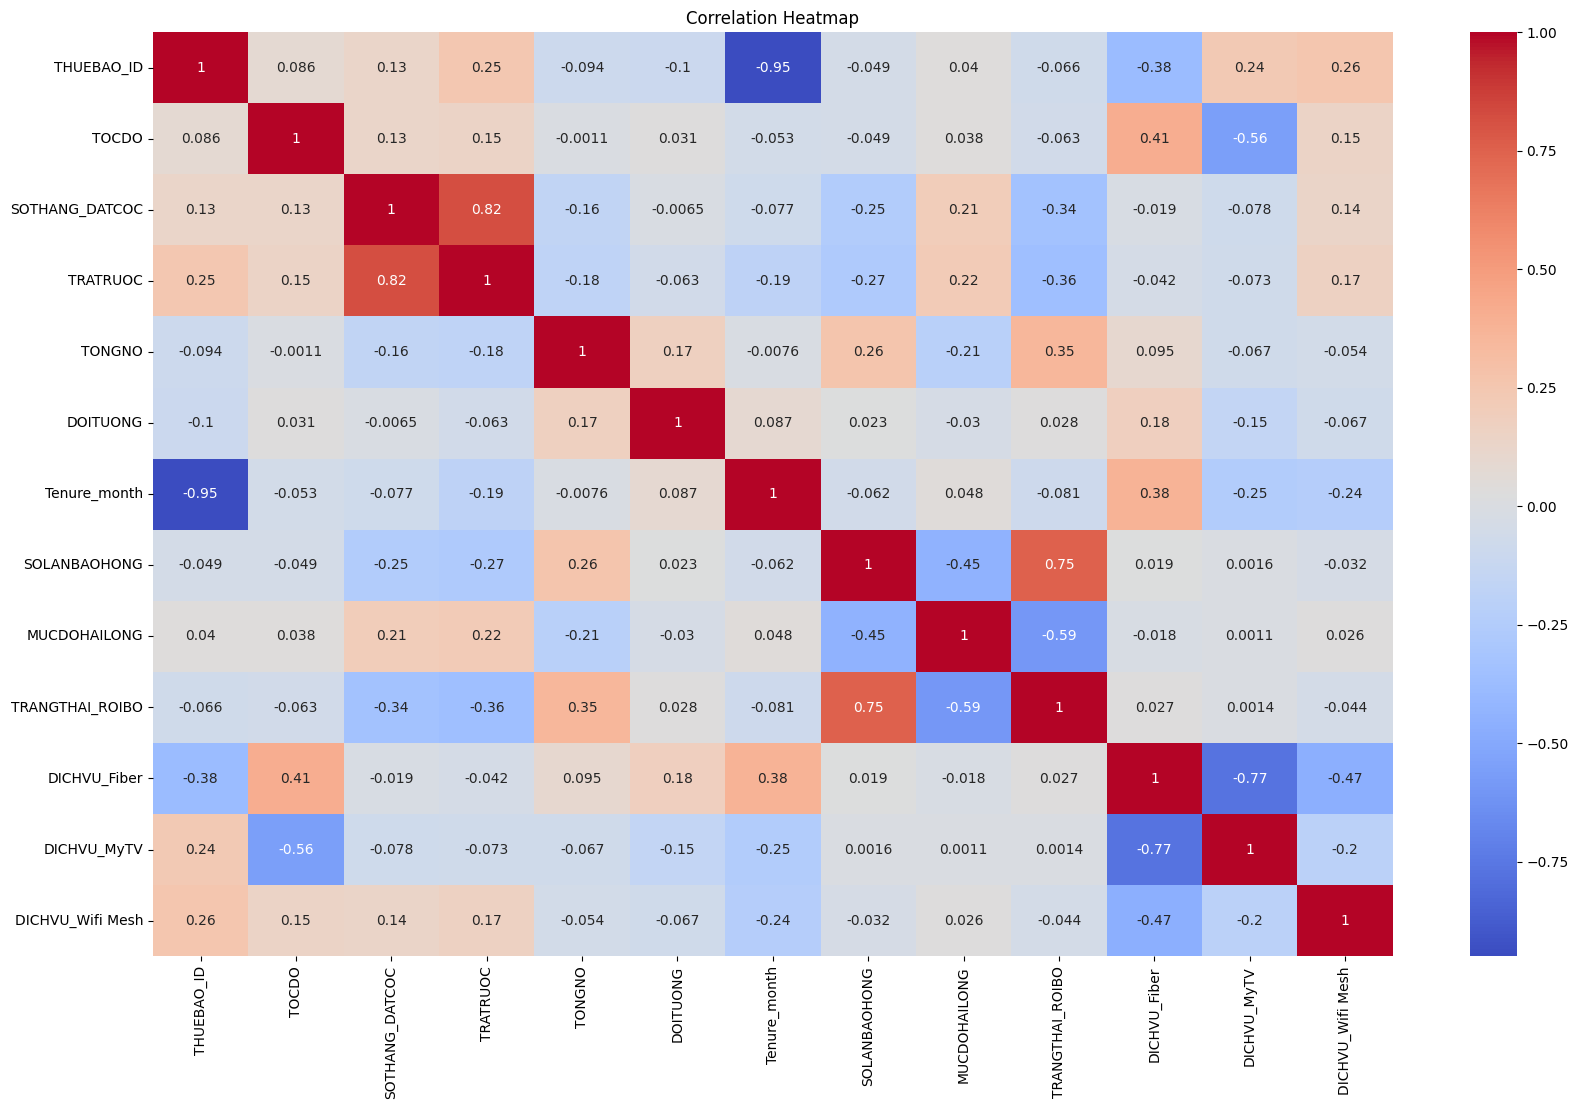

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [40]:
df['TRANGTHAI_ROIBO'].value_counts()

TRANGTHAI_ROIBO
0    354257
1     68602
Name: count, dtype: int64

In [41]:
X = df.drop(columns=['TRANGTHAI_ROIBO','THUEBAO_ID','SOTHANG_DATCOC'])
Y = df['TRANGTHAI_ROIBO']

In [42]:
X.head()

,TOCDO,TRATRUOC,TONGNO,DOITUONG,Tenure_month,SOLANBAOHONG,MUCDOHAILONG,DICHVU_Fiber,DICHVU_MyTV,DICHVU_Wifi Mesh
0,50,0.0,0.0,0,85.0,3,5,True,False,False
1,200,1.0,0.0,0,4.0,4,4,True,False,False
2,120,1.0,0.0,1,19.0,3,4,True,False,False
3,150,1.0,0.0,1,8.0,1,5,True,False,False
4,150,1.0,0.0,1,31.0,2,4,True,False,False


In [43]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: TRANGTHAI_ROIBO, dtype: int64

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X, Y = smote.fit_resample(X, Y)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [46]:
X_train

,TOCDO,TRATRUOC,TONGNO,DOITUONG,Tenure_month,SOLANBAOHONG,MUCDOHAILONG,DICHVU_Fiber,DICHVU_MyTV,DICHVU_Wifi Mesh
367019,150,1.0,0.0,0,12.0,2,4,False,False,True
341433,80,0.0,1435500.0,1,23.0,9,4,True,False,False
419555,120,0.0,912580.0,0,29.0,5,5,True,False,False
18083,120,1.0,0.0,0,189.0,1,4,True,False,False
296702,150,0.0,354839.0,0,60.0,10,4,True,False,False
...,...,...,...,...,...,...,...,...,...,...
259178,120,0.0,506711.0,0,53.0,5,1,True,False,False
365838,120,0.0,0.0,0,51.0,5,4,True,False,False
131932,0,0.0,0.0,0,14.0,3,4,False,True,False
671155,150,1.0,0.0,0,9.0,9,3,False,False,True


In [47]:
X_test

,TOCDO,TRATRUOC,TONGNO,DOITUONG,Tenure_month,SOLANBAOHONG,MUCDOHAILONG,DICHVU_Fiber,DICHVU_MyTV,DICHVU_Wifi Mesh
11137,0,0.000000,0.000000,0,26.000000,5,5,False,True,False
113405,150,1.000000,0.000000,0,2.000000,1,4,False,False,True
457816,0,0.000000,125187.000000,0,5.124633,8,4,False,True,False
344856,120,1.000000,0.000000,0,43.000000,1,5,True,False,False
442841,150,1.000000,30451.807332,0,19.495321,5,3,False,False,True
...,...,...,...,...,...,...,...,...,...,...
307294,120,0.000000,153537.000000,0,71.000000,9,1,True,False,False
365462,150,1.000000,0.000000,0,12.000000,3,4,True,False,False
446719,250,0.155818,0.000000,0,42.155818,5,4,True,False,False
609406,80,0.000000,95334.000000,0,88.478883,6,3,True,False,False


In [48]:
y_train

367019    0
341433    1
419555    1
18083     0
296702    1
         ..
259178    1
365838    0
131932    0
671155    1
121958    0
Name: TRANGTHAI_ROIBO, Length: 566811, dtype: int64

In [49]:
y_test

11137     0
113405    0
457816    1
344856    0
442841    1
         ..
307294    1
365462    0
446719    1
609406    1
182144    0
Name: TRANGTHAI_ROIBO, Length: 141703, dtype: int64

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [51]:
X_train_sc

array([[ 0.34340409,  1.15414173, -0.29204094, ..., -1.40785452,
        -0.58595922,  2.97683174],
       [-0.29378496, -0.89900187,  3.04972472, ...,  0.71030066,
        -0.58595922, -0.33592762],
       [ 0.07032307, -0.89900187,  1.8323955 , ...,  0.71030066,
        -0.58595922, -0.33592762],
       ...,
       [-1.022001  , -0.89900187, -0.29204094, ..., -1.40785452,
         1.7066034 , -0.33592762],
       [ 0.34340409,  1.15414173, -0.29204094, ..., -1.40785452,
        -0.58595922,  2.97683174],
       [-0.11173094,  1.15414173, -0.29204094, ...,  0.71030066,
        -0.58595922, -0.33592762]])

In [52]:
# Time for Classification Models
import time

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#Khai báo các thuật toán phân lớp sử dụng
dict_classifiers = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=5000),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB(),
}

In [53]:
import numpy as np
no_classifiers = len(dict_classifiers.keys())

#Xây dựng hàm huấn luyện theo các thuật toán
#Xác định thời gian chạy khi huấn luyện của mỗi thuật toán
#Cho biết Độ chính xác của mô hình khi chạy huấn luyện
#Thời gian chạy huấn luyện của mô hình
def batch_classify(X_train_sc, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.process_time()
        classifier.fit(X_train_sc, Y_train)
        t_end = time.process_time()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train_sc, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [54]:
#Thực hiện việc huấn luyện các mô hình với dữ liệu huấn luyện
df_results = batch_classify(X_train_sc, y_train,verbose=True)
print(df_results.sort_values(by='train_score', ascending=False))

C:\Users\Admin\AppData\Local\Temp\ipykernel_9588\60535183.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Logistic Regression' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_results.loc[count,'classifier'] = key


trained Logistic Regression in 3.05 s
trained Nearest Neighbors in 3.80 s
trained Gradient Boosting Classifier in 65.56 s
trained Decision Tree in 0.77 s
trained Random Forest in 7.05 s
trained Neural Net in 51.44 s
trained Naive Bayes in 0.27 s
                     classifier  train_score  training_time
3                 Decision Tree     0.994070       0.765625
4                 Random Forest     0.993919       7.046875
1             Nearest Neighbors     0.990455       3.796875
2  Gradient Boosting Classifier     0.989220      65.562500
0           Logistic Regression     0.981362       3.046875
5                    Neural Net     0.977559      51.437500
6                   Naive Bayes     0.959928       0.265625


In [55]:
#SO SÁNH ĐỘ CHÍNH XÁC CỦA MÔ HÌNH ML TRONG KHI TRAIN VÀ KHI TEST VỚI 2 MÔ HÌNH CÓ ĐỘ CHÍNH XÁC CAO NHÂT
# Model: Desicion Tree - acc = 100% khi Train
# Model: Random Forest - acc = 99.7% khi Train

print('Model: Desicion Tree')
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_train_sc, y_train)

acc_decision_tree = round(decision_tree.score(X_train_sc, y_train) * 100, 3)
print("Độ chính xác của mô hình Decision tree trên tập Train: ", acc_decision_tree, "%")
#--------------------------------
#Sử dụng mô hình Train chạy dữ liệu TEST và đánh giá độ chính xác
Y_pred = decision_tree.predict(X_test_sc)
from sklearn.metrics import accuracy_score
print("Độ chính xác của mô hình Decision tree trên tập Test:", round(accuracy_score(y_test,Y_pred)*100,2))

Model: Desicion Tree
Độ chính xác của mô hình Decision tree trên tập Train:  99.407 %
Độ chính xác của mô hình Decision tree trên tập Test: 99.22


In [56]:
print('Model: Random Forest')
random_forest = RandomForestClassifier(criterion='entropy', n_estimators=100)
random_forest.fit(X_train_sc, y_train)
#Đánh giá độ chính xác trên tập huấn luyện:
acc_random_forest = round(random_forest.score(X_train_sc, y_train) * 100, 3)
print("Độ chính xác của mô hình Random Forest trên tập Train: ", acc_random_forest, "%")
#---------------------------------------------------------------------------------------
#Sử dụng mô hình Train chạy dữ liệu TEST và đánh giá độ chính xác
Y_pred = random_forest.predict(X_test_sc)
print("Độ chính xác của mô hình Random Forest trên tập Test:", round(accuracy_score(y_test,Y_pred)*100,2))

Model: Random Forest
Độ chính xác của mô hình Random Forest trên tập Train:  99.405 %
Độ chính xác của mô hình Random Forest trên tập Test: 99.21


In [57]:
# Sử dụng  Cross-validation để giải quyết vấn đề overfitting.
#Mỗi thuật toán thực hiện 5 lần huấn luyện trên tập TRAIN với kỹ thuật Cross Validation,
#
#---------------------------------------------------------------

from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)
log_scores = cross_val_score(log_reg, X_train_sc, y_train, cv=5)
log_reg_mean = log_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train_sc, y_train, cv=5)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train_sc, y_train, cv=5)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train_sc, y_train, cv=5)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train_sc, y_train, cv=5)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train_sc, y_train, cv=5)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train_sc, y_train, cv=5)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'],
    'Crossval Mean Scores': [log_reg_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [58]:
#Hiển thị kết quả của các thuật toán với kỹ thuật Cross Validation
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
4,Rand FC,0.991666
2,Dec Tree,0.991599
3,Grad B CLF,0.989229
1,KNN,0.988772
0,Logistic Reg.,0.981287
5,Neural Classifier,0.976677
6,Naives Bayes,0.976677


In [59]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

#grad_clf = GradientBoostingClassifier()
y_train_pred = cross_val_predict(grad_clf, X_train_sc, y_train, cv=5)
from sklearn.metrics import accuracy_score
#grad_clf.fit(X_train, y_train)
#Độ chính xác tính trên tập TRAIN:
print ("TRAIN: Gradient Boost Classifier accuracy is %2.4f" % accuracy_score(y_train, y_train_pred))

TRAIN: Gradient Boost Classifier accuracy is 0.9892


In [60]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

#neural_clf = MLPClassifier(alpha=1)
y_train_pred_n = cross_val_predict(neural_clf, X_train_sc, y_train, cv=5)
from sklearn.metrics import accuracy_score
#neural_clf.fit(X_train, y_train)
#Độ chính xác tính trên tập TRAIN:
print ("TRAIN: Neural classifier accuracy is %2.4f" % accuracy_score(y_train, y_train_pred_n))

TRAIN: Neural classifier accuracy is 0.9765


In [61]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

#nav_clf = GaussianNB()
y_train_pred_nb = cross_val_predict(nav_clf, X_train_sc, y_train, cv=5)
from sklearn.metrics import accuracy_score
#nav_clf.fit(X_train, y_train)
#Độ chính xác tính trên tập TRAIN:
print ("TRAIN: Navie Bayes accuracy is %2.4f" % accuracy_score(y_train, y_train_pred_nb))

TRAIN: Navie Bayes accuracy is 0.9599


In [62]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

#nav_clf = GaussianNB()
y_train_pred_nb = cross_val_predict(rand_clf, X_train_sc, y_train, cv=5)
from sklearn.metrics import accuracy_score
#nav_clf.fit(X_train, y_train)
#Độ chính xác tính trên tập TRAIN:
print ("TRAIN: Navie Bayes accuracy is %2.4f" % accuracy_score(y_train, y_train_pred_nb))

TRAIN: Navie Bayes accuracy is 0.9917


In [63]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

#nav_clf = GaussianNB()
y_train_pred_nb = cross_val_predict(log_reg, X_train_sc, y_train, cv=5)
from sklearn.metrics import accuracy_score
#nav_clf.fit(X_train, y_train)
#Độ chính xác tính trên tập TRAIN:
print ("TRAIN: Logicstics Regression Classifier is %2.4f" % accuracy_score(y_train, y_train_pred_nb))

TRAIN: Logicstics Regression Classifier is 0.9813


In [65]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

#nav_clf = GaussianNB()
y_train_pred_nb = cross_val_predict(decision_tree, X_train_sc, y_train, cv=5)
from sklearn.metrics import accuracy_score
#nav_clf.fit(X_train, y_train)
#Độ chính xác tính trên tập TRAIN:
print ("TRAIN: Decision Tree is %2.4f" % accuracy_score(y_train, y_train_pred_nb))
print ("Test: Decision Tree is %2.4f" % accuracy_score(y_test,Y_pred))

TRAIN: Decision Tree is 0.9916
Test: Decision Tree is 0.9921


In [66]:
# Khởi tạo mô hình
decision_tree = DecisionTreeClassifier()

# Huấn luyện mô hình trên dữ liệu huấn luyện
decision_tree.fit(X_train_sc, y_train)

# Dự đoán kết quả với dữ liệu kiểm tra
y_predicted = decision_tree.predict(X_test_sc)

In [67]:
y_predicted

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [68]:
y_predicted_probas =decision_tree.predict_proba(X_test_sc)
y_predicted_probas

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [69]:
from sklearn.metrics import accuracy_score
print("Decision Tree Classifier accuracy is %2.4f" % accuracy_score(y_test,y_predicted))

Decision Tree Classifier accuracy is 0.9921


In [70]:
#Hiển thị confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
print('Confusion matrix:')
print(cnf_matrix)

Confusion matrix:
[[70890   216]
 [  897 69700]]


In [71]:
len(y_test)

141703

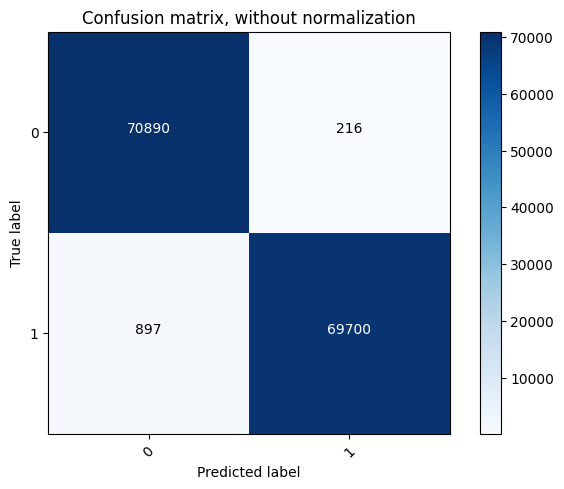

In [73]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#f, ax = plt.subplots(1,2, figsize=(14,6))
# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

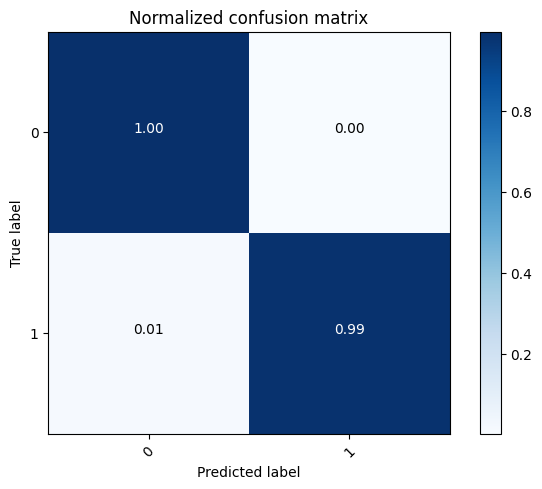

In [74]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [75]:
import numpy as np 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import ClassPredictionError


import warnings
warnings.filterwarnings('ignore')

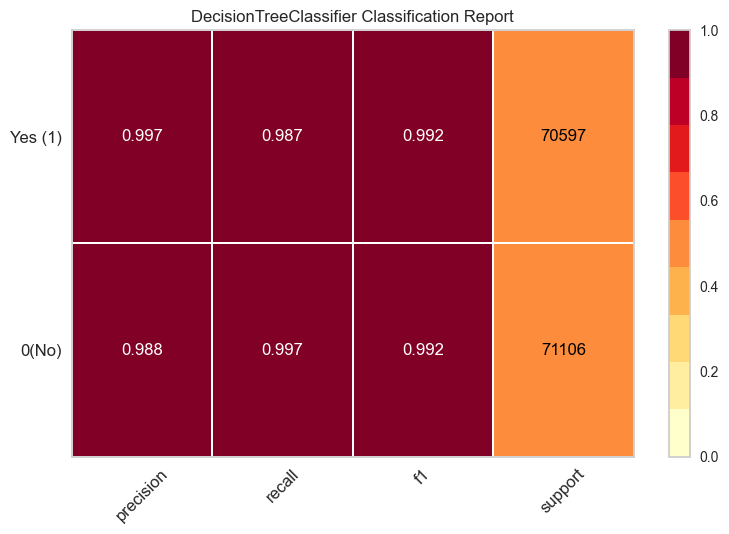

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [76]:
import matplotlib.pyplot as plt
from yellowbrick.classifier import ClassificationReport
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
# Specify the target classes
classes = ["0(No)", "Yes (1)"]

# Create the visualizer
visualizer = ClassificationReport(decision_tree, classes=classes, support=True)

# Fit and score the visualizer
visualizer.fit(X_train_sc, y_train)
visualizer.score(X_test_sc, y_test)



# Show the plot
visualizer.show()  # Use show() instead of poof()

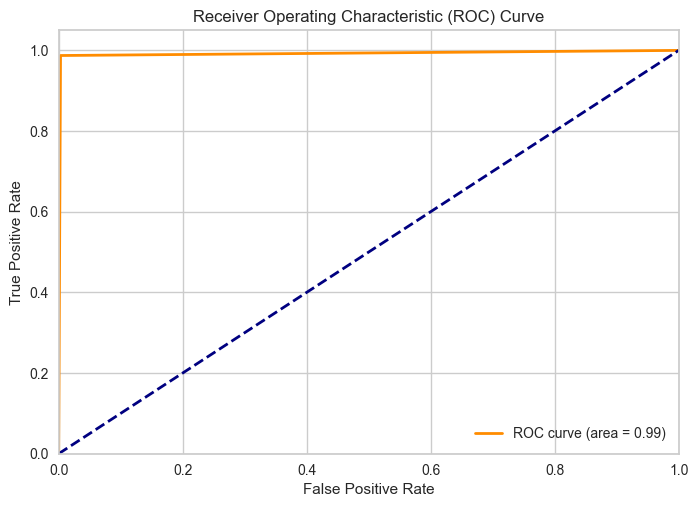

In [77]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_predicted)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
!pip install graphviz
!pip install pydotplus


   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.1 kB ? eta -:--:--
   -------------------------- ------------- 30.7/47.1 kB 435.7 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 396.6 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/278.7 kB ? eta -:--:--
     ---- -------------------------------- 30.7/278.7 kB 262.6 kB/s eta 0:00:01
     -------- ---------------------------- 61.4/278.7 kB 409.6 kB/s eta 0:00:01
     ------------- ---------------------- 102.4/278.7 kB 535.8 kB/s eta 0:00:01
     ----------------------- ------------ 184.3/278.7 kB 743.9 kB/s eta 0:00:01
     -------------------------------------  276.5/278.7 kB 1.0 MB/s eta 0:00:01
     ------------------------------------ 278.7/278.7 kB 903.8 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


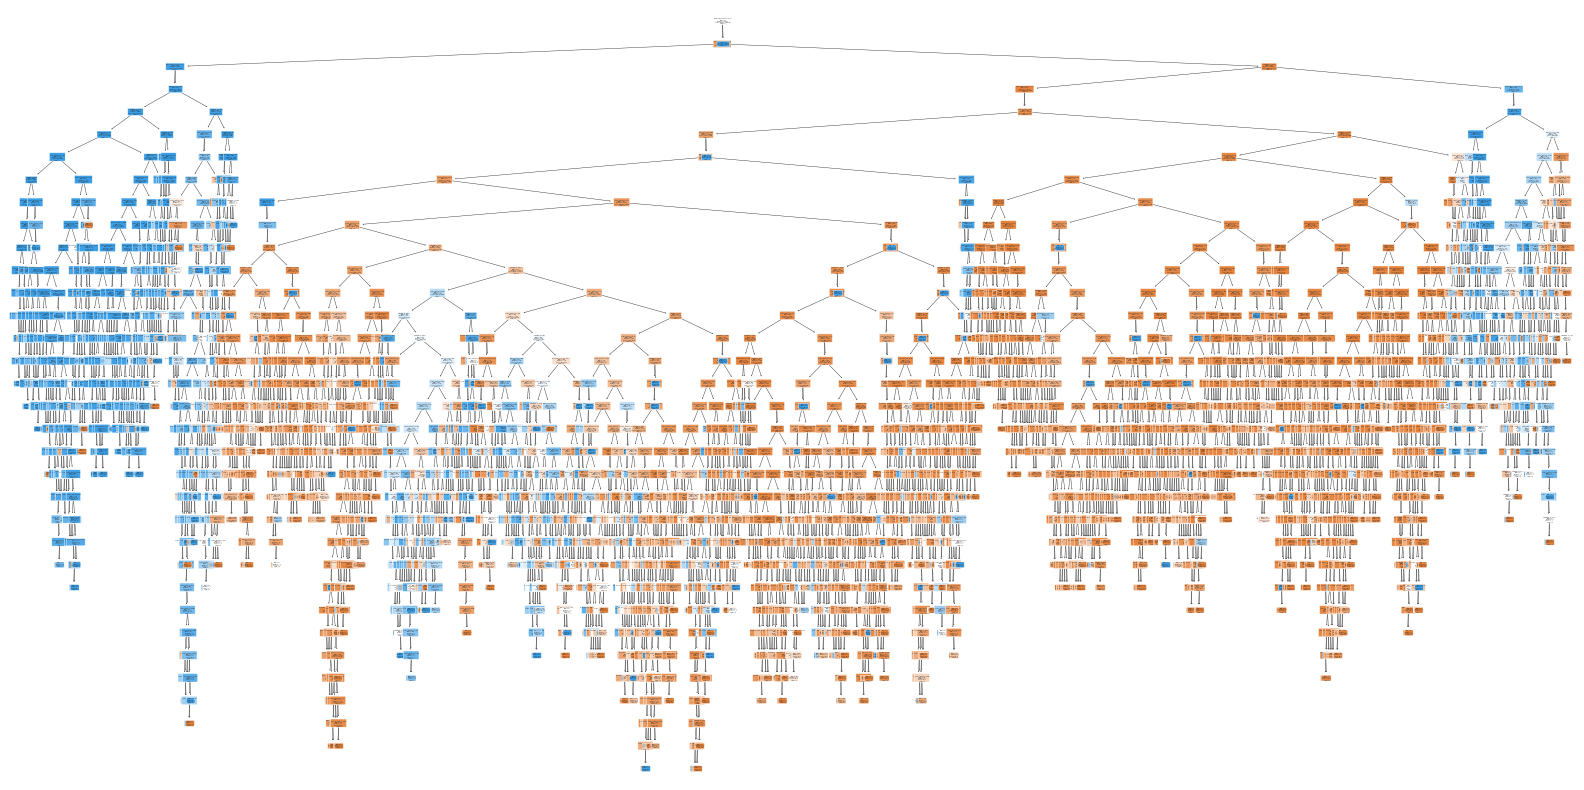

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Trực quan hóa mô hình cây quyết định
plt.figure(figsize=(20,10))  # Đặt kích thước hình ảnh
plot_tree(decision_tree, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()


In [84]:
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

<Figure size 1000x500 with 0 Axes>

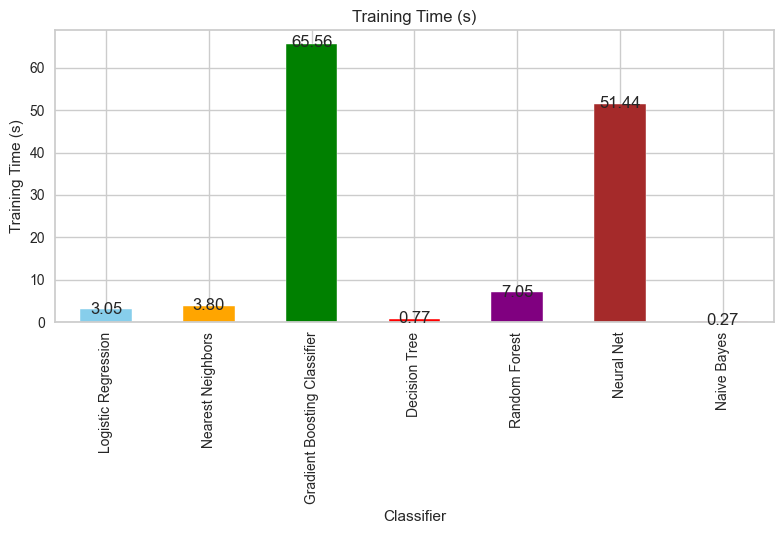

In [85]:
# Plotting the results
def plot_training_time(df_results):
    plt.figure(figsize=(10, 5))
    ax = df_results.plot(x='classifier', y='training_time', kind='bar', color=colors, legend=False)
    plt.title('Training Time (s)')
    plt.ylabel('Training Time (s)')
    plt.xlabel('Classifier')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() * 1.005),
                    ha='center', va='center')
    plt.tight_layout()
    plt.show()
plot_training_time(df_results)

<Figure size 1000x500 with 0 Axes>

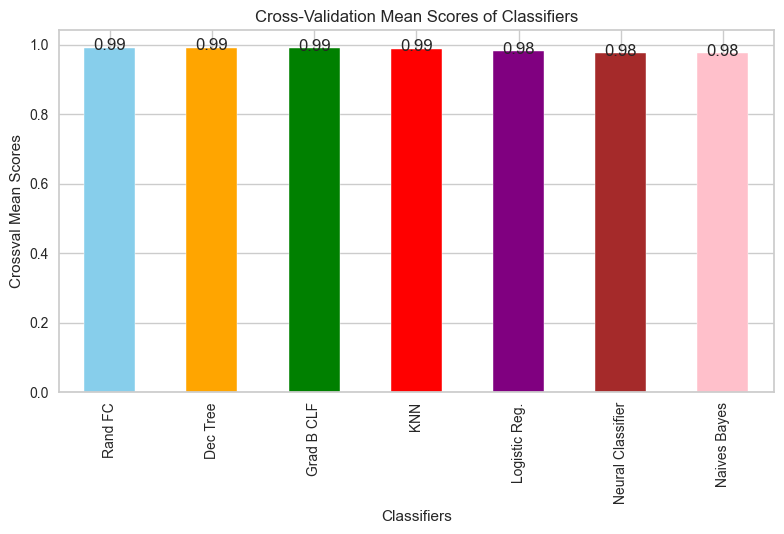

,Classifiers,Crossval Mean Scores
4,Rand FC,0.991666
2,Dec Tree,0.991599
3,Grad B CLF,0.989229
1,KNN,0.988772
0,Logistic Reg.,0.981287
5,Neural Classifier,0.976677
6,Naives Bayes,0.976677


In [86]:
# Plotting the cross-validation mean scores
plt.figure(figsize=(10, 5))
ax = result_df.plot(x='Classifiers', y='Crossval Mean Scores', kind='bar', color=colors, legend=False)
plt.title('Cross-Validation Mean Scores of Classifiers')
plt.ylabel('Crossval Mean Scores')
plt.xlabel('Classifiers')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() * 1.005),
                ha='center', va='center')
plt.tight_layout()
plt.show()

result_df